<a href="https://colab.research.google.com/github/Nkoyoasuz/A-Linear-Regression-Model/blob/main/A_LINEAR_REGRESSION_MODEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A Linear Regression model to predict house prices in Lagos

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/crib (1).csv')

In [ ]:
df.head()

,Property Ref,Added On,Last Updated,Market Status,Type,Bedrooms,Bathrooms,Toilets,Parking Spaces,Furnishing,Price,District,State,Servicing,Service Charge,Total Area,Covered Area
0,2619053,13 Dec 2024,27 Mar 2025,Available,House,3.0,3.0,4.0,1.0,Furnished,110000000.0,Lekki,Lagos,NaN,NaN,NaN,NaN
1,2674076,21 Jan 2025,15 Apr 2025,Available,Terraced Duplex,4.0,4.0,5.0,3.0,NaN,530000000.0,Victoria Island (VI),Lagos,Serviced,NaN,NaN,NaN
2,2820608,15 Apr 2025,15 Apr 2025,Available,Semi-detached Duplex,5.0,7.0,6.0,4.0,NaN,850000000.0,Lekki,Lagos,NaN,NaN,NaN,NaN
3,2820575,15 Apr 2025,15 Apr 2025,Available,Detached Duplex,5.0,5.0,6.0,5.0,NaN,450000000.0,Lekki,Lagos,NaN,NaN,NaN,NaN
4,2790291,27 Mar 2025,15 Apr 2025,Available,Detached Duplex,4.0,4.0,5.0,3.0,NaN,250000000.0,Lekki,Lagos,Serviced,NaN,NaN,NaN


In [ ]:
df.dtypes

,0
Type,object
Bedrooms,float64
Bathrooms,float64
Toilets,float64
Parking Spaces,float64
Furnishing,object
Price,float64
District,object
State,object
Servicing,object


# Data Cleaning & Preprocessing

In [ ]:
df.drop(['Property Ref', 'Added On', 'Last Updated', 'Market Status'], axis=1, inplace=True)

In [ ]:
# Replace commas in numerical values and convert to float
df['Service Charge'] = df['Service Charge'].str.replace('₦', '').str.replace(',', '').str.extract('(\d+\.?\d*)')[0].astype(float)

In [ ]:
# Convert area columns to float (remove 'sqm', commas)
df['Total Area'] = df['Total Area'].str.replace(',', '').str.extract('(\d+\.?\d*)')[0].astype(float)
df['Covered Area'] = df['Covered Area'].str.replace(',', '').str.extract('(\d+\.?\d*)')[0].astype(float)


In [ ]:
# Convert Price to numeric (if not already)
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

In [ ]:
# Fill missing numeric values with median
num_cols = df.select_dtypes(include=np.number).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())


In [ ]:
# Fill missing categorical values with mode
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Encode Categorical Features

In [ ]:
# One-hot encoding
df_encoded = pd.get_dummies(df, columns=['Type', 'Furnishing', 'District', 'State', 'Servicing'], drop_first=True)


# Define Features and Target

In [ ]:
X = df_encoded.drop('Price', axis=1)
y = df_encoded['Price']


# Train-Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Build and Train the Model

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

# Evaluate the Model

In [ ]:
y_pred = model.predict(X_test)

print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


Mean Squared Error (MSE): 9.432876669405296e+20
R² Score: -0.022777638987592663


# Visualize Predictions

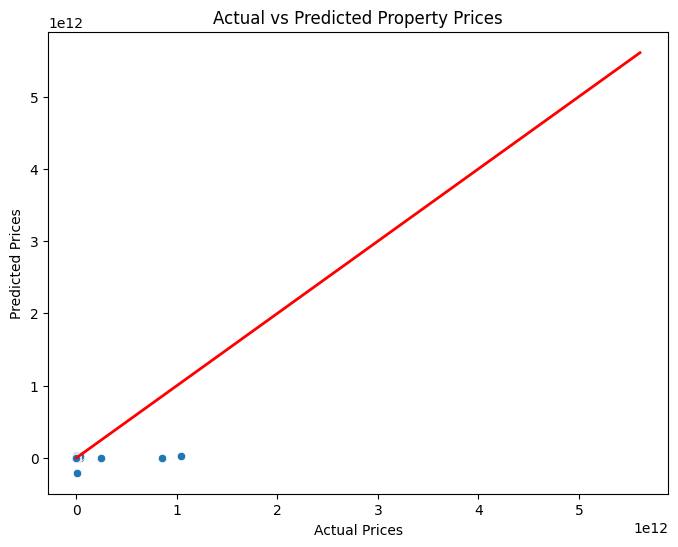

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Property Prices")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', lw=2)
plt.show()


# Check Feature Importance

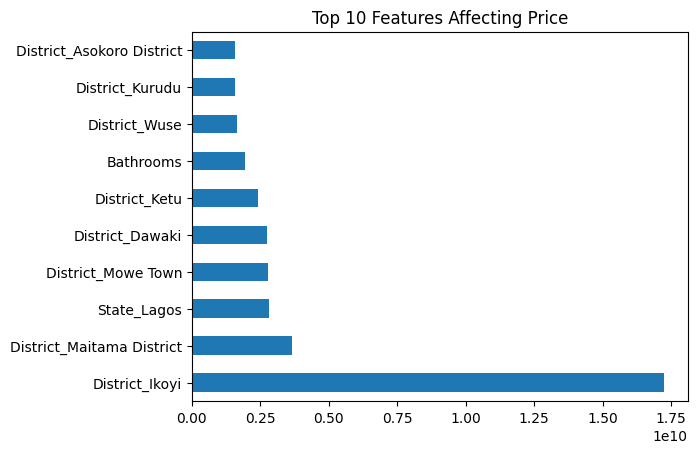

In [ ]:
coefficients = pd.Series(model.coef_, index=X.columns)
coefficients.nlargest(10).plot(kind='barh')
plt.title("Top 10 Features Affecting Price")
plt.show()